In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 100

# Data Loading

# Loading the california housing dataset CSV

```
We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).
```

In [2]:
housing = pd.read_csv("data/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.shape

(20640, 10)

In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
continuous_dependent = housing.columns[:-2]

<IPython.core.display.Javascript object>


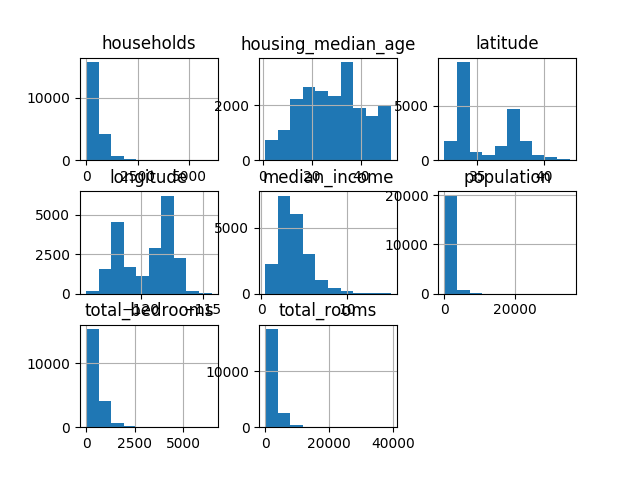

In [7]:
housing[continuous_dependent].hist();

<IPython.core.display.Javascript object>


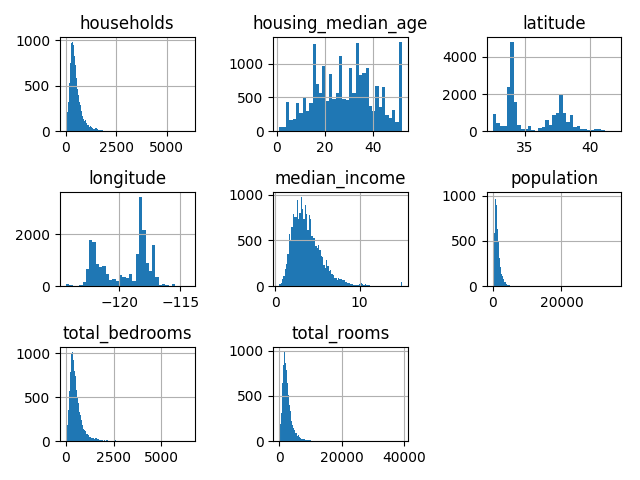

In [8]:
housing[continuous_dependent].hist(bins="auto")
plt.tight_layout()

In [9]:
housing.population.sort_values().tail()

6057     15507.0
10309    16122.0
13139    16305.0
9880     28566.0
15360    35682.0
Name: population, dtype: float64

# Exercise
Come up with a way to visualize the population data which can help us inspect the outliers.

In [ ]:
# your solution here

In [ ]:
# my solution
# . . . 

# Exercise
We can do better!

In [ ]:
# your solution here

In [ ]:
# my solution
# . . . 

# Exercise
Create a 2 x 3 subplot grid showing housing_median_age, total_rooms, total_bedrooms, population, households and median_income
each as a hexbin.

# Dealing with missing values a little bit

In [10]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
housing_nonull = housing.dropna().copy()

# scatter matrix / pair plot

In [12]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2]);

<IPython.core.display.Javascript object>

In [13]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2], c=housing.ocean_proximity);
# error

<IPython.core.display.Javascript object>

ValueError: Invalid RGBA argument: 'NEAR BAY'

In [14]:
unique_proximity, ocean_proximity_int = np.unique(housing_nonull.ocean_proximity, return_inverse=True)
ocean_proximity_int

array([3, 3, 3, ..., 1, 1, 1])

In [15]:
unique_proximity

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

<IPython.core.display.Javascript object>


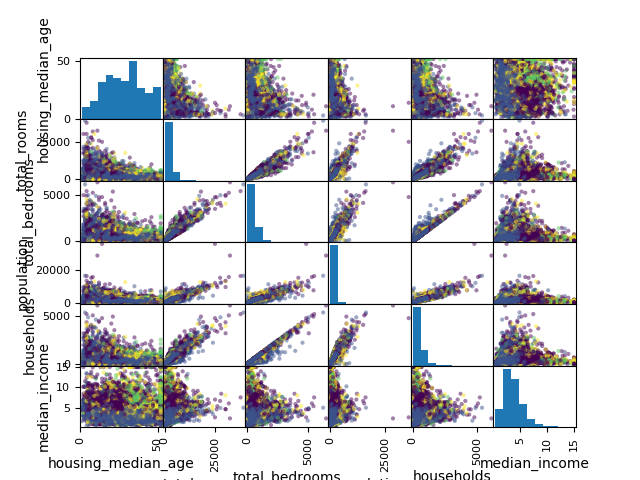

In [16]:
pd.plotting.scatter_matrix(housing_nonull.iloc[:, 2:-2], c=ocean_proximity_int);

<IPython.core.display.Javascript object>


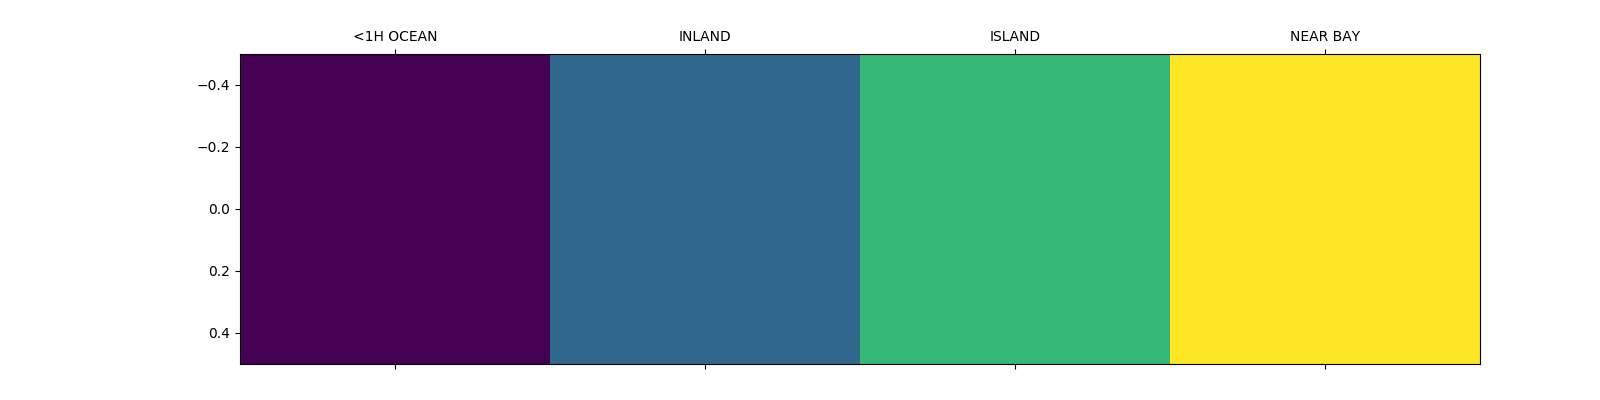

([<matplotlib.axis.XTick at 0x111f51cf8>,
 <a list of 4 Text xticklabel objects>)

In [17]:
plt.matshow(np.arange(4).reshape(1, 4))
plt.xticks(range(4), unique_proximity)

In [18]:
import seaborn.apionly as sns
sns.pairplot(housing_nonull.iloc[:, 2:], hue='ocean_proximity')

ModuleNotFoundError: No module named 'seaborn'

# Exercise
- Confirm the coloring of the scatter matrix makes sense by plotting latitude vs longitude colored by ocean distance.
- Are the two outliers the same for all the plots?

In [ ]:
# solution here

## Exploring the target (dependent variable)

<IPython.core.display.Javascript object>


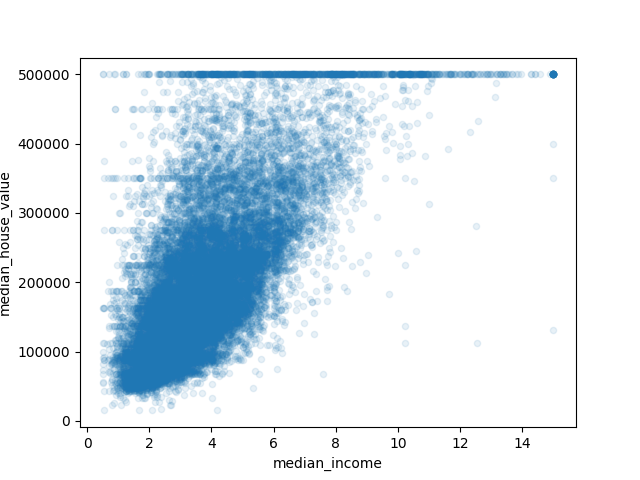

In [19]:
housing_nonull.plot('median_income', 'median_house_value', kind='scatter', alpha=.1)

## Exercise
Do a scatter plot of all the continuous dependent variables against the median house value.

In [ ]:
# solution